# Amazon Sales Data Analysis

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

### Importing data with pandas

In [3]:

dataset = pd.read_csv('Amazon_sales_report.csv', low_memory=False)

dataset.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


### Data Cleaning

In [4]:
# Renaming columns to be code friendly
dataset.columns = dataset.columns.str.lower().str.replace('-', '_').str.strip().str.replace(' ', '_')

In [5]:
# Let's change the data types of some columns
dataset.date = pd.to_datetime(dataset.date)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128975 non-null  int64         
 1   order_id            128975 non-null  object        
 2   date                128975 non-null  datetime64[ns]
 3   status              128975 non-null  object        
 4   fulfilment          128975 non-null  object        
 5   sales_channel       128975 non-null  object        
 6   ship_service_level  128975 non-null  object        
 7   style               128975 non-null  object        
 8   sku                 128975 non-null  object        
 9   category            128975 non-null  object        
 10  size                128975 non-null  object        
 11  asin                128975 non-null  object        
 12  courier_status      122103 non-null  object        
 13  qty                 128975 no

C:\Users\okkas\AppData\Local\Temp\ipykernel_12972\3352593017.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset.date = pd.to_datetime(dataset.date)


In [6]:
# Let's quickly get a general overview of the values that we have in the columns
dataset.apply(pd.unique)

index                 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
order_id              [405-8078784-5731545, 171-9198151-1101146, 404...
date                  [2022-04-30T00:00:00.000000000, 2022-04-29T00:...
status                [Cancelled, Shipped - Delivered to Buyer, Ship...
fulfilment                                           [Merchant, Amazon]
sales_channel                                   [Amazon.in, Non-Amazon]
ship_service_level                                [Standard, Expedited]
style                 [SET389, JNE3781, JNE3371, J0341, JNE3671, SET...
sku                   [SET389-KR-NP-S, JNE3781-KR-XXXL, JNE3371-KR-X...
category              [Set, kurta, Western Dress, Top, Ethnic Dress,...
size                   [S, 3XL, XL, L, XXL, XS, 6XL, M, 4XL, 5XL, Free]
asin                  [B09KXVBD7Z, B09K3WFS32, B07WV4JV4D, B099NRCT7...
courier_status                     [nan, Shipped, Cancelled, Unshipped]
qty                                    [0, 1, 2, 15, 3, 9, 13, 5

In [7]:
dataset.drop(['sku', 'asin', 'promotion_ids', 'fulfilled_by', 'unnamed:_22', 'ship_country', 'currency', 'style', 'sales_channel', 'index'], axis=1, inplace=True)

In [8]:
dataset.groupby(dataset.date.dt.month).amount.sum()
# Here we can see that march month is an outlier with relatively very small revenue, so it's better to just remove it.
dataset.drop(dataset[dataset.date.dt.month==3].index, axis=0, inplace=True)

In [9]:
# Let's remove if there are any duplicates
duplicates = dataset[dataset.duplicated()]
dataset.drop_duplicates(inplace=True)
print(f'Found {len(duplicates)} duplicate rows and removed them') if not duplicates.empty else print('Found 0 duplicate rows and removed them')


Found 785 duplicate rows and removed them


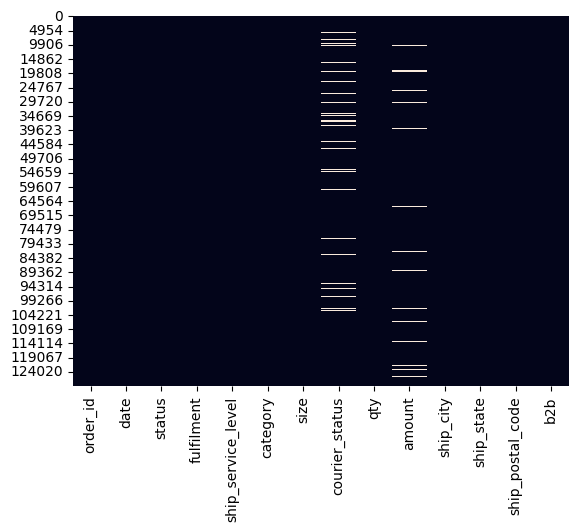

In [10]:
# I see many null values in the rows, let's get an overview of how many we have with better visualization
sns.heatmap(data=dataset.isnull(), cbar=False);

In [11]:
# Let's fill up the empty or NULL values
dataset.courier_status = dataset.courier_status.fillna(value='unknown')
dataset.amount = dataset.amount.fillna(value=0)
dataset.ship_city = dataset.ship_city.fillna(value='unknown')
dataset.ship_state = dataset.ship_state.fillna(value='unknown')
dataset.ship_postal_code = dataset.ship_postal_code.fillna(value='unknown')

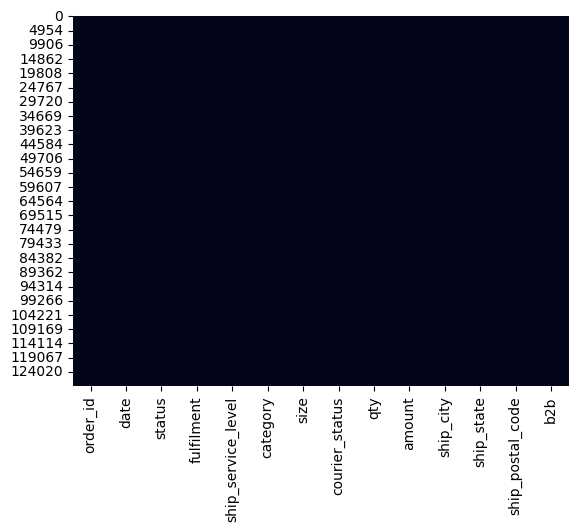

In [12]:
sns.heatmap(data=dataset.isnull(), cbar=False);
# All Clear!

# Data Wrangling

In [212]:
# Adding a month column with respective month names
dataset.date.dt.month.unique()

months = ['April', 'May', 'June']
dataset['month'] = dataset.date.dt.month.replace(4, 'April').replace(5, 'May').replace(6, 'June')

In [213]:
# Even if we sort these values by month it will be alphabetical sort not categorical, so let's define it as categorical dtype
dataset['month'] = pd.Categorical(dataset['month'], categories=months, ordered=True)

# Same goes for Sizes
dataset['size'].unique()
sizes = ['XS', 'S', 'M', 'L', 'XL', 'XXL', '3XL', '4XL', '5XL', '6XL', 'Free']
dataset['size'] = pd.Categorical(dataset['size'], categories=sizes, ordered=True)

We can combine multiple different order status into one, like shipped - out for delivery and shipped are basically the same within the context of this analysis. So let's categorise them better.

In [320]:
replacements = {'Shipped - Delivered to Buyer': 'Delivered',
               'Shipped - Returned to Seller':'Cancelled',
               'Shipped - Out for Delivery':'Shipped',
               'Shipped - Returning to Seller':'Cancelled',
               'Shipped - Rejected by Buyer':'Cancelled',
               'Shipped - Picked Up': 'Shipped'}
dataset.status = dataset.status.replace(replacements)

# Data visualization

In [15]:
dataset.isnull().sum()
# All Clear!

order_id              0
date                  0
status                0
fulfilment            0
ship_service_level    0
category              0
size                  0
courier_status        0
qty                   0
amount                0
ship_city             0
ship_state            0
ship_postal_code      0
b2b                   0
month                 0
dtype: int64

### Month on month revenue trend

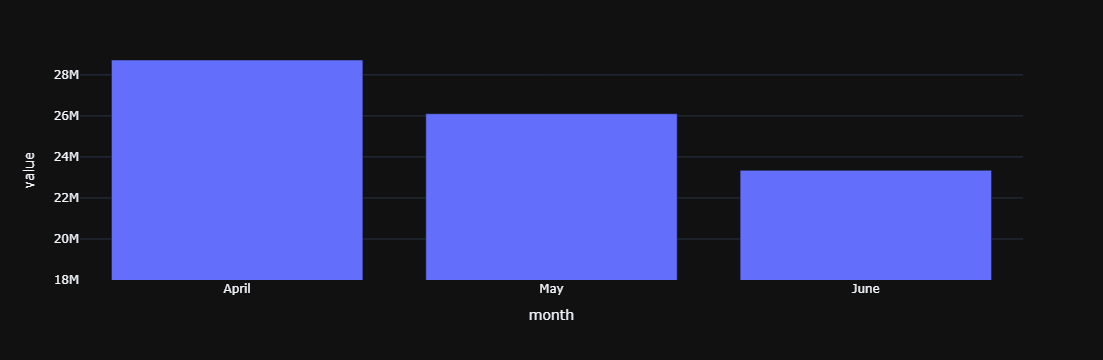

In [62]:
monthly_revenue = dataset.groupby('month', observed=False).amount.sum()
px.bar(monthly_revenue, template='plotly_dark').update_layout(showlegend=False).update_yaxes(range=[18000000,monthly_revenue.max()])

### Category wise revenue

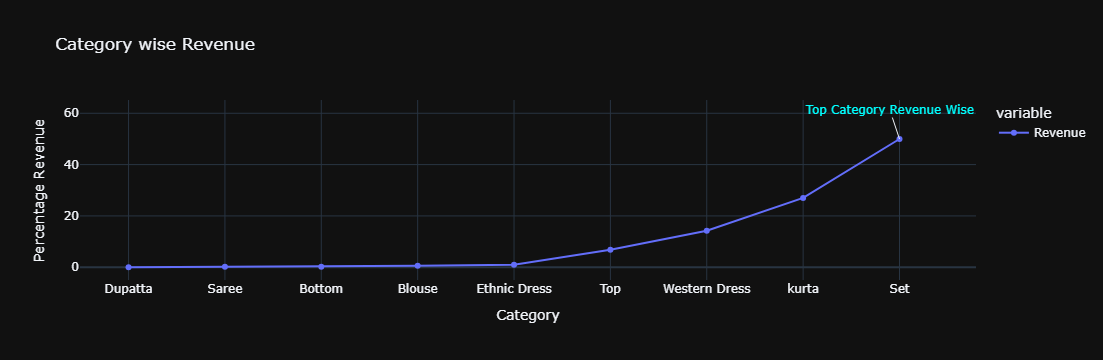

The best performing category among all the clothing categories was Set with 49.98% share of total revenue.


In [385]:
percent_revenue = (dataset.groupby('category', observed=False).amount.sum()*100/dataset.groupby('category', observed=False).amount.sum().sum()).sort_values()
percent_plot = px.line(percent_revenue, markers=True, template='plotly_dark', title='Category wise Revenue', labels={'value':'Percentage Revenue', 'category':'Category'})
percent_plot.add_annotation(
    x=percent_revenue.index[-1],
    y=percent_revenue.max(),
    xref="x",
    yref="y",
    text="Top Category Revenue Wise",
    showarrow=True,
    font=dict(
        color="cyan",
        size=12
    )
)
percent_plot.update_traces(name='Revenue')
percent_plot.show()

top_cat_pr = percent_revenue.values.max()
top_cat = percent_revenue[percent_revenue.values==top_cat_pr].index[0]
print(f'The best performing category among all the clothing categories was {top_cat} with {round(top_cat_pr,2)}% share of total revenue.\n')

### Category wise average amount

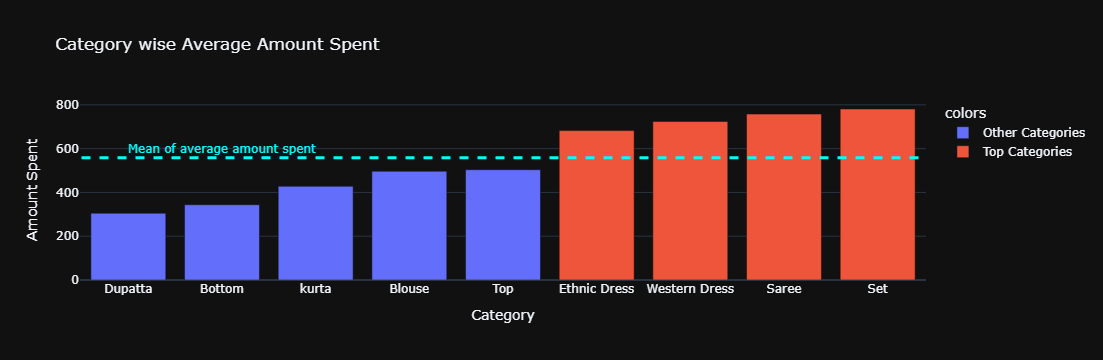

The top performing categories based on average amount spent are Western Dress, Set, Saree & Ethnic Dress



In [388]:
average_amount = dataset.groupby('category', observed=False).amount.mean().reset_index().sort_values('category', ascending=False)
mean_amount = average_amount['amount'].mean()
average_amount['colors'] = average_amount['amount'].apply(lambda x: 'lime' if x>mean_amount else 'dodgerblue')

fig = px.bar(average_amount, x='category', y='amount', color='colors', title='Category wise Average Amount Spent', template='plotly_dark', 
             labels={'category':'Category', 'amount':'Amount Spent'})
fig.add_shape(type="line",
              x0=-0.5,
              y0=mean_amount,
              x1=len(average_amount) - 0.5,
              y1=mean_amount,
              line=dict(
                  color="cyan",
                  width=3,
                  dash="dash"
              ))

fig.add_annotation(
    x=1,
    y=mean_amount*1.08,
    xref="x",
    yref="y",
    text="Mean of average amount spent",
    showarrow=False,
    font=dict(
        color="cyan",
        size=12
    )
)
fig.for_each_trace(lambda t: t.update(name='Top Categories' if t.name == 'lime' else 'Other Categories'))
fig.update_xaxes(categoryorder='total ascending')
fig.update_layout(hoverlabel_font_color='white')
fig.show()

top_cats = average_amount[average_amount.amount>mean_amount].category.values
print(f'The top performing categories based on average amount spent are {', '.join(top_cats[:-1])} & {top_cats[-1]}\n')

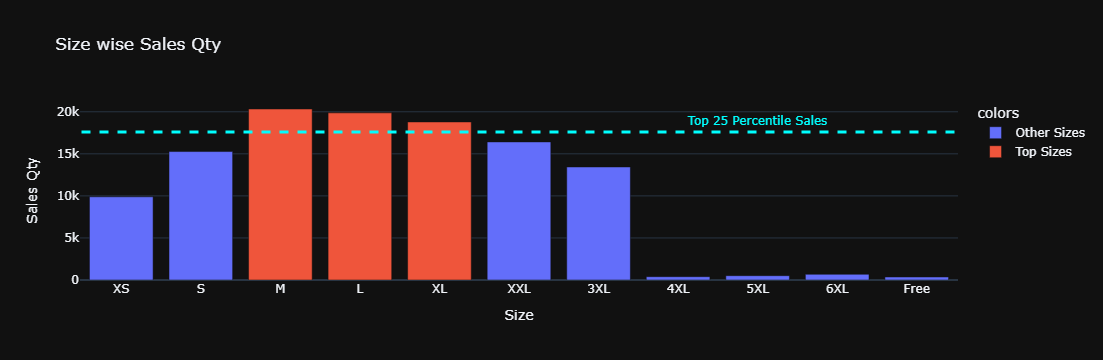

Among all the sizes the most common (Those in top 25 percentile) seem to be M, L & XL



In [387]:
# Size wise sales qty
top_sales = dataset[dataset.qty!=0].groupby('size', observed=True).qty.sum().reset_index().sort_values('size')
top_qty = np.percentile(top_sales.qty, [75])
top_sales['colors'] = np.where(top_sales.qty >= np.full(len(top_sales.qty), top_qty), 'lime', 'dodgerblue')
fig = px.bar(top_sales, x='size', y='qty', color = 'colors', template='plotly_dark', title='Size wise Sales Qty', labels={
    'qty':'Sales Qty', 'size':'Size'})
fig.for_each_trace(lambda t: t.update(name='Top Sizes' if t.name == 'lime' else 'Other Sizes'))
fig.add_shape(type="line",
              x0=-0.5,
              y0=top_qty[0],
              x1=len(top_sales['size'])-0.5,
              y1=top_qty[0],
              line=dict(
                  color="cyan",
                  width=3,
                  dash="dash"
              ))

fig.add_annotation(
    x=len(top_sales['size'])-3,
    y=top_qty[0]*1.08,
    xref="x",
    yref="y",
    text="Top 25 Percentile Sales",
    showarrow=False,
    font=dict(
        color="cyan",
        size=12
    ))
fig.update_xaxes(categoryorder='array', categoryarray=['XS', 'S', 'M', 'L', 'XL', 'XXL', '3XL', '4XL', '5XL', '6XL', 'Free'])
fig.show()

top_sizes = top_sales[top_sales['colors']=='lime']['size']
print(f'Among all the sizes the most common (Those in top 25 percentile) seem to be {', '.join(top_sizes.values[:-1])} & {top_sizes.values[-1]}\n')

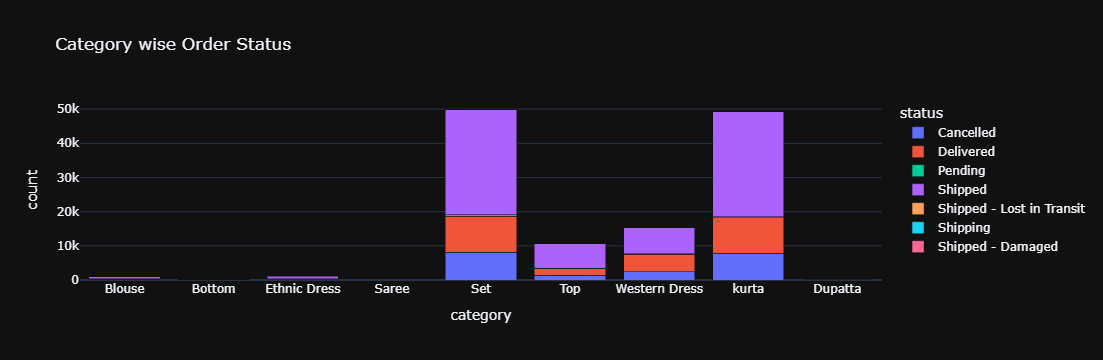

A total of 20148 orders or 15.74% of total orders were cancelled or returned with highest number of cancellations being from Set category.



In [391]:
order_status = dataset.groupby(['category','status'], observed=False).size().reset_index(name='count')
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

fig = px.bar(order_status, x='category', y='count', barmode='stack', color='status', template='plotly_dark', title='Category wise Order Status')
fig.update_layout(hoverlabel_font_color='white')
fig.show()

cancelled_orders = order_status[order_status.status.str.contains('Cancelled')]
max_cancelled = cancelled_orders.loc[cancelled_orders['count'].idxmax()]
print(f'A total of {cancelled_orders['count'].sum()} orders or {round((cancelled_orders['count'].sum()*100/order_status['count'].sum()),2)}% of total orders were cancelled or returned with highest number of cancellations being from {max_cancelled['category']} category.\n')


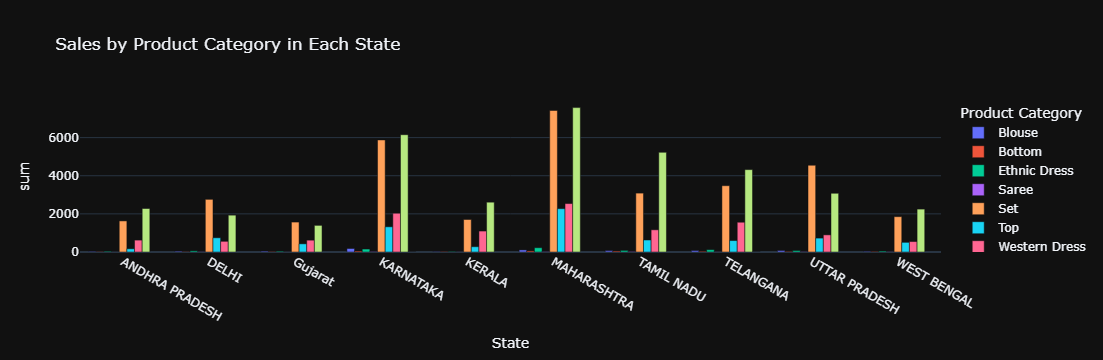

Among the top categories throughout the states MAHARASHTRA had highest total orders while also topping in kurta category with total 7574 kurtas ordered.



In [463]:
top_states = dataset.groupby('ship_state').qty.sum().reset_index().sort_values('qty', ascending=False)[:10].ship_state.values
state_cats = dataset[dataset.ship_state.isin(top_states)].groupby(['ship_state', 'category']).qty.sum().reset_index(name='sum')

fig = px.bar(state_cats, x='ship_state', y='sum', color='category', barmode='group',
             template='plotly_dark', title='Sales by Product Category in Each State',
             labels={'qty': 'Sales', 'ship_state': 'State', 'category': 'Product Category'})

fig.show()

top = state_cats[state_cats['sum']==state_cats['sum'].max()]

print(f'Among the top categories throughout the states {''.join(top.ship_state.values)} had highest total orders while also topping in {''.join(top.category.values)} category with total {top['sum'].values[0]} {''.join(top.category.values)}s ordered.\n')